In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the Dataset
df=pd.read_csv('/Users/divyasandiman/Downloads/loan_prediction.csv')

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
for i in df.columns:
    print(f'Value Count for {i} is \n {df[i].value_counts()}')
    print('_______________________________________')

Value Count for Loan_ID is 
 LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
_______________________________________
Value Count for Gender is 
 Male      489
Female    112
Name: Gender, dtype: int64
_______________________________________
Value Count for Married is 
 Yes    398
No     213
Name: Married, dtype: int64
_______________________________________
Value Count for Dependents is 
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
_______________________________________
Value Count for Education is 
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64
_______________________________________
Value Count for Self_Employed is 
 No     500
Yes     82
Name: Self_Employed, dtype: int64
_______________________________________
Value Count for ApplicantIncome is 
 2500    9
4583    6
6000    6
2600    6
33

In [5]:
df.isnull().sum().sum() # Altogether there are 149 Nan values in dataset

149

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### There are 8 Categorical features and 5 numerical features. 

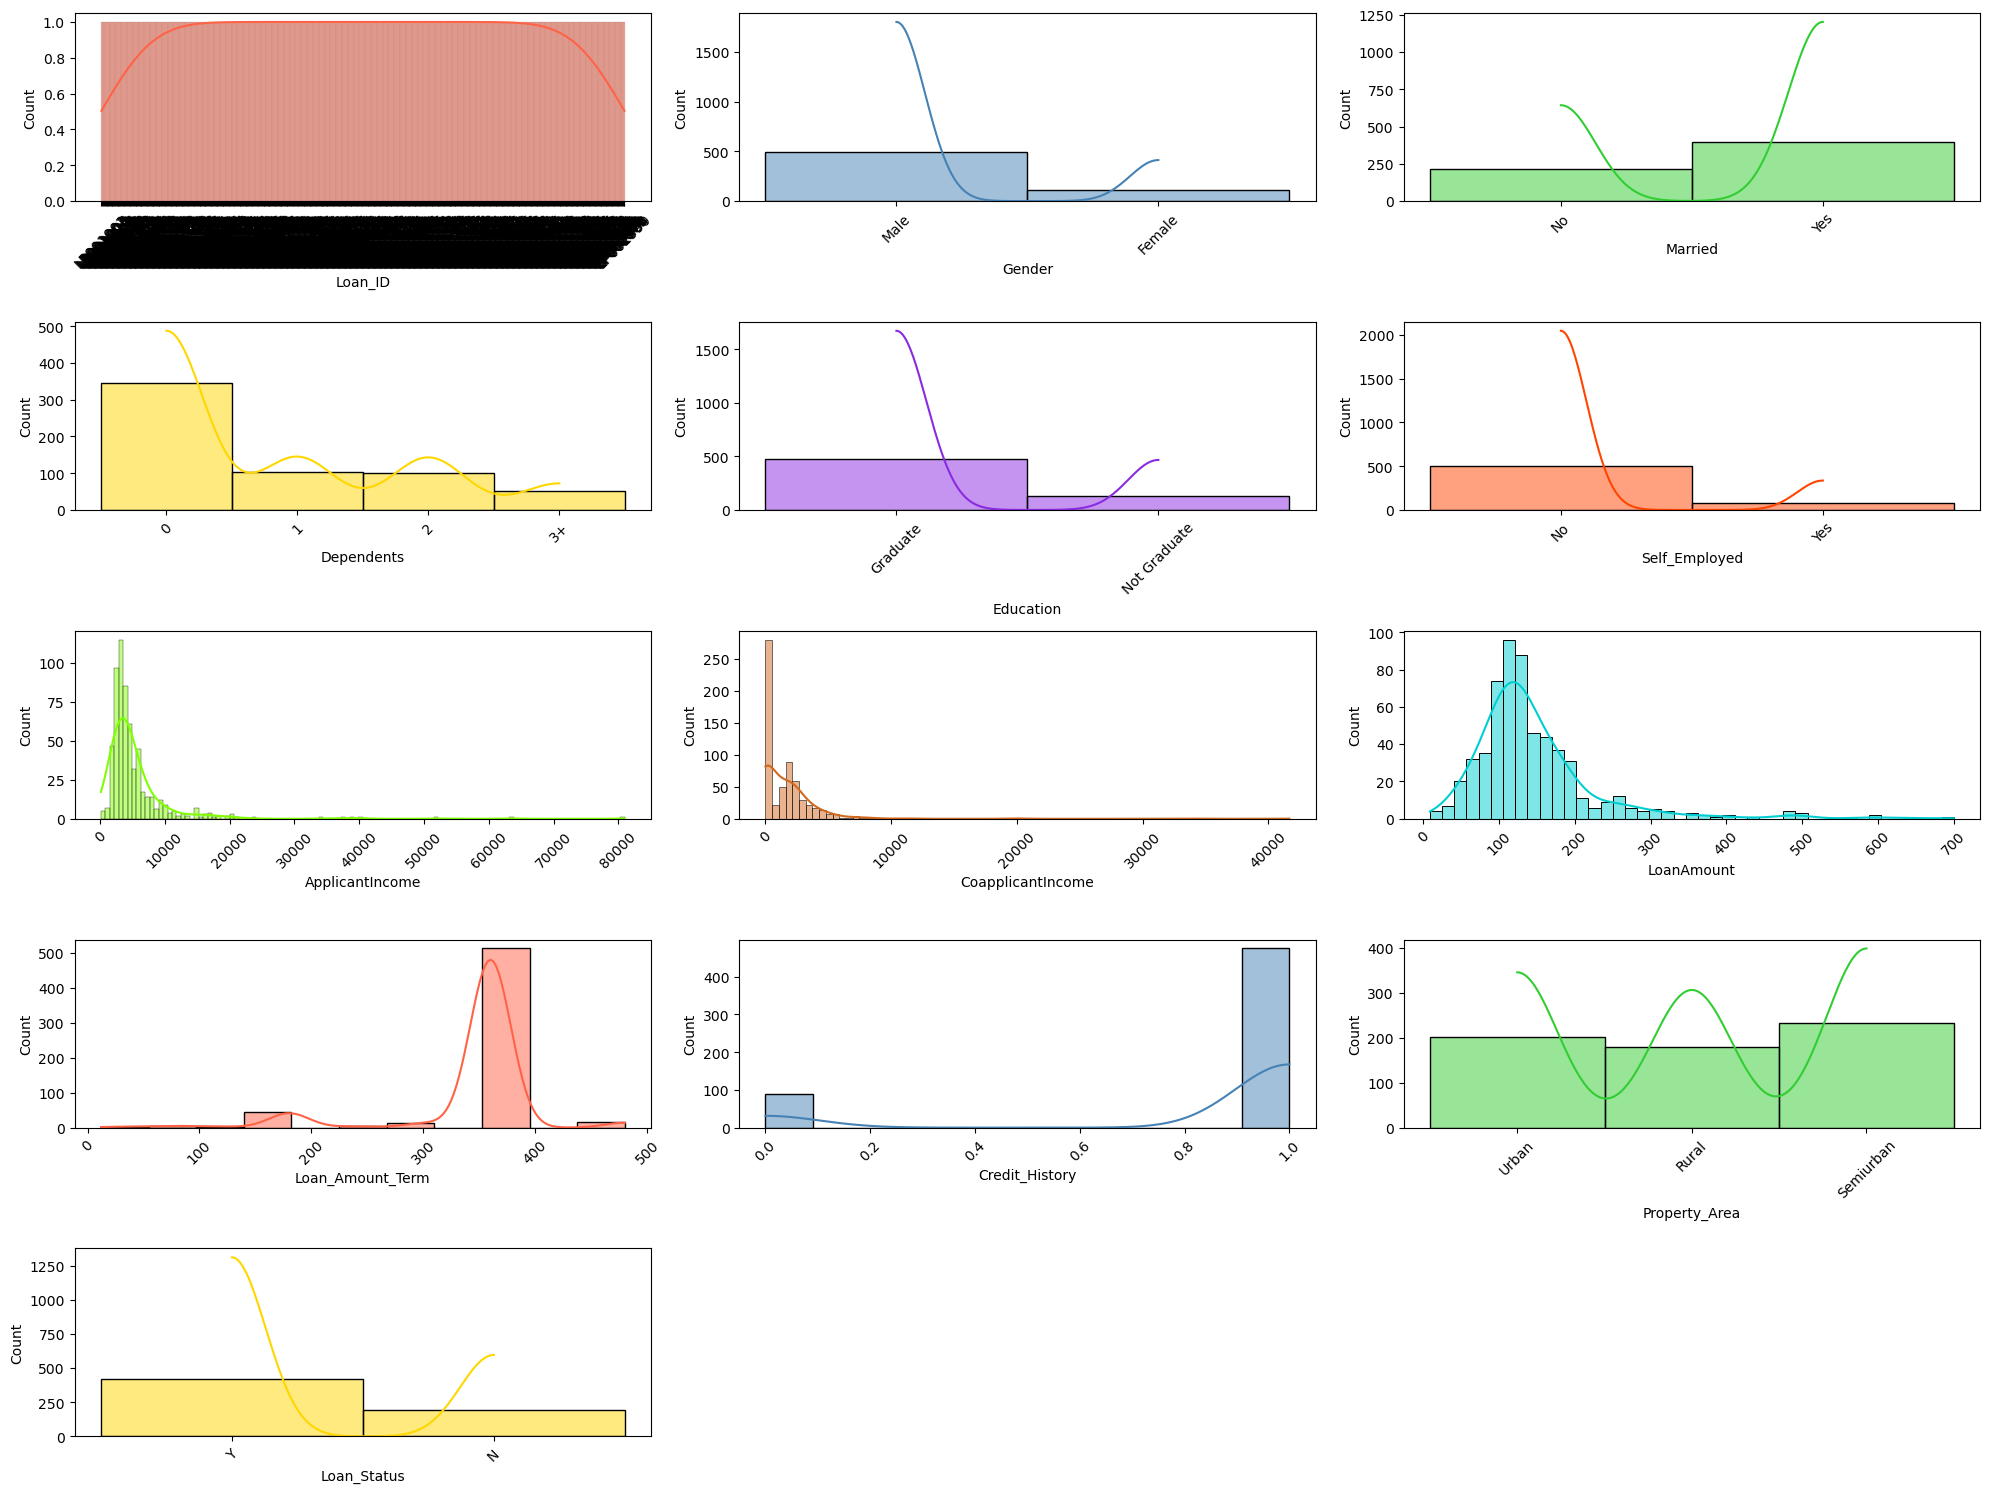

In [9]:
# Custom colors
custom_colors = ["#FF6347", "#4682B4", "#32CD32", "#FFD700", "#8A2BE2", "#FF4500", "#7FFF00", "#D2691E", "#00CED1"]

plt.figure(figsize=(20, 15))

# Loop through each column in the DataFrame
for num, i in enumerate(df.columns):
    plt.subplot(5, 3, num + 1)
    sns.histplot(x=i, data=df, color=custom_colors[num % len(custom_colors)], kde=True)  # Use modulo to cycle colors
    plt.xlabel(i)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


#### There is presence of outliers in the in numerical features. Also there is an imbalance in target variable as well as most categorical variables

In [10]:
df.drop('Loan_ID',axis=1,inplace=True) # Dropping Loan_ID as its just an index column

In [11]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [12]:
le=LabelEncoder() # Creating instance of Label Encoder

In [13]:
df['Loan_Status']=le.fit_transform(df['Loan_Status']) # Encoding Target variable

In [15]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [14]:
df['Loan_Status'].value_counts()# We can see the imbalance in number of approved loans '1' and rejected loans '0'

1    422
0    192
Name: Loan_Status, dtype: int64

In [17]:
df['Dependents'].value_counts() #Dependents column is having a category 3+ which makes dtype of column Object

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [19]:
df['Dependents']=df['Dependents'].replace('3+',3)# Replacing 3+ with 3 so we can change the column to numerical

In [20]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0]) # Filling nan with 1st instance of mode values

In [21]:
df['Dependents']=df['Dependents'].astype(int) # changing data type to int

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 57.7+ KB


In [23]:
num_cols=[
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']  # Creating a list of numerical columns

In [24]:
df.select_dtypes(include=['object']).columns.tolist() # This is a list of categorical columns however we need to break it down

['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [25]:
ord_cols=['Education','Property_Area'] # Columns for ordinal encoding

In [26]:
ohe_cols=['Gender', 'Married', 'Self_Employed'] # Columns for OneHotEncoding

In [28]:
ordinal_encoder = OrdinalEncoder(categories=[['Not Graduate', 'Graduate'], ['Rural', 'Semiurban', 'Urban']])
# Creating instance of ordinal encoder while defining the order.

In [29]:
df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [30]:
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
]) # Pipeline for numerical columns with steps as imputer and scaler

In [52]:
ord_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', ordinal_encoder)
]) # Pipeline for ordinal columns with steps as imputer and ordinal encoder

In [53]:
ohe_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(sparse=False, drop='first'))
]) # Pipeline for OneHotEncoder columns with steps as imputer and OneHotEncoder

In [54]:
transform = ColumnTransformer(transformers=[
    ('preprocessing_num', num_pipe, num_cols),
    ('encode_ohe', ohe_pipe, ohe_cols),
    ('encode_ord', ord_pipe, ord_cols)
], remainder='passthrough')
# Creating instance of ColumnTransformer which includes all preprocessing steps for Numerical and categorical columns

In [55]:
model_pipe = Pipeline(steps=[
    ('preprocessing', transform),
    ('model', RandomForestClassifier())
])
 # Creating instance of Model Pipeline that has transformer as 1st step and model as 2nd step

In [56]:
model_grid=[
    {'model':[RandomForestClassifier()]},
    {'model':[LogisticRegression()]},
    {'model':[SVC()]},
    {'model':[GradientBoostingClassifier()]}
]
# Creating a grid of models to select the best working model from GridSearchCV

In [36]:
df.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [37]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [38]:
x=df.drop('Loan_Status',axis=1) # Extracting x data

In [39]:
y=df['Loan_Status'] # Extracting y data

In [40]:
x.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [41]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
# Splitting data into training and testing

In [43]:
gscv=GridSearchCV(model_pipe,model_grid,cv=5,scoring='accuracy',verbose=2)
# Creating instance of GridSearchCV that takes model_pipe as the model/estimator and uses model_grid as params

In [44]:
gscv.fit(x_train,y_train) #training the gscv model

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END .....................model=RandomForestClassifier(); total time=   0.2s
[CV] END .....................model=RandomForestClassifier(); total time=   0.1s
[CV] END .....................model=RandomForestClassifier(); total time=   0.1s
[CV] END .....................model=RandomForestClassifier(); total time=   0.2s
[CV] END .....................model=RandomForestClassifier(); total time=   0.1s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END .........................model=LogisticRegression(); total time=   0.0s
[CV] END ........................................model=SVC(); total time=   0.0s
[CV] END ........................................

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('preprocessing_num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ApplicantIncome',
                                                                          'CoapplicantIncome',
                                                                          'LoanAmount',
                                                                          'Loan_Amount_Term',
                                                                          'Credit_History']),
                                                                        ('encode_ohe',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleI...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ordinal',
                                                                                          OrdinalEncoder(categories=[['Not '
                                                                                                                      'Graduate',
                                                                                                                      'Graduate'],
                                                                                                                     ['Rural',
                                                                                                                      'Semiurban',
                                                                                                                      'Urban']]))]),
                                                                         ['Education',
                                                                          'Property_Area'])])),
                                       ('model', RandomForestClassifier())]),
             param_grid=[{'model': [RandomForestClassifier()]},
                         {'model': [LogisticRegression()]}, {'model': [SVC()]},
                         {'model': [GradientBoostingClassifier()]}],
             scoring='accuracy', verbose=2)

In [45]:
gscv.best_score_ # the accuracy score is 81%

0.810513296227582

In [46]:
gscv.best_params_ # model is selected as logistic Regression

{'model': LogisticRegression()}

In [47]:
model=gscv.best_estimator_ # creating instance of the model

In [48]:
predict=model.predict(x_test) # Predicting the test data

In [49]:
accuracy_score(y_test,predict) # Getting an accuracy score of 79%

0.7886178861788617

In [50]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



### Model predicts the class 0 better than the class 1. This could be due to the imbalance in target categories as well as other categories. We can further use SMOTE to improve models performance.

## The Model works well but some improvements can be made to further tune it.